In [1]:
import math
import warnings

from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import scipy.stats as stats
# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

In [2]:
df = pd.read_csv('C:/Users/keith/Desktop/Thinkful/NEW_YORK-Offenses_Known_to_Law_Enforcement_by_City_201313tbl8ny.csv',encoding = "ISO-8859-1")

pd.set_option('display.max_columns', None) # disables trucated columns 
pd.set_option('display.max_rows', None) # disables trucated rows

df.head(5)

,Table 8,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,NEW YORK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Offenses Known to Law Enforcement,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"by City, 2013",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,City,Population,Violent\ncrime,Murder and\nnonnegligent\nmanslaughter,Rape\n(revised\ndefinition)1,Rape\n(legacy\ndefinition)2,Robbery,Aggravated\nassault,Property\ncrime,Burglary,Larceny-\ntheft,Motor\nvehicle\ntheft,Arson3
4,Adams Village,"1,861",0,0,NaN,0,0,0,12,2,10,0,0


In [3]:
df = df.loc[3:,:]
df

,Table 8,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
3,City,Population,Violent\ncrime,Murder and\nnonnegligent\nmanslaughter,Rape\n(revised\ndefinition)1,Rape\n(legacy\ndefinition)2,Robbery,Aggravated\nassault,Property\ncrime,Burglary,Larceny-\ntheft,Motor\nvehicle\ntheft,Arson3
4,Adams Village,"1,861",0,0,NaN,0,0,0,12,2,10,0,0
5,Addison Town and Village,"2,577",3,0,NaN,0,0,3,24,3,20,1,0
6,Akron Village,"2,846",3,0,NaN,0,0,3,16,1,15,0,0
7,Albany,"97,956",791,8,NaN,30,227,526,"4,090",705,"3,243",142,NaN
8,Albion Village,"6,388",23,0,NaN,3,4,16,223,53,165,5,NaN
9,Alfred Village,"4,089",5,0,NaN,0,3,2,46,10,36,0,NaN
10,Allegany Village,"1,781",3,0,NaN,0,0,3,10,0,10,0,0
11,Amherst Town,"118,296",107,1,NaN,7,31,68,"2,118",204,"1,882",32,3
12,Amityville Village,"9,519",9,0,NaN,2,4,3,210,16,188,6,1


In [4]:
df = df.loc[:,['Table 8','Unnamed: 1','Unnamed: 3','Unnamed: 6', 'Unnamed: 8','Unnamed: 10','Unnamed: 11','Unnamed: 12','Unnamed: 7' ]]
df.columns = ['City','Population','Murder','Robbery','Property_crime','Theft','MV','Arson','Asslt' ]

In [5]:
df = df.loc[4:351,:]

In [6]:
df['Population'] = df['Population'].str.replace(',','')
df['Population'] = df['Population'].astype(float)

In [7]:
df['Population_sq'] = df.Population*df.Population 

In [8]:
df = df.drop(df.index[216]) # dropping New York as an outlier
df.index = pd.RangeIndex(len(df.index))
df.index = range(len(df.index))

In [9]:
# convert columns from string to int 
 
cols = ['Property_crime','Murder','Robbery','Theft','MV','Arson','Asslt']
df = df.dropna(how='any', inplace=False)
 
df[cols] = df[cols].replace({ ',': ''}, regex=True)
df[cols] = df[cols].astype(int, regex=True)

In [10]:
# convert 'Murder' and 'Robbery' to binary
df.loc[df['Murder'] > 0, 'Murder'] = 1
df.loc[df['Murder'] <= 0, 'Murder'] = 0
df.loc[df['Robbery'] > 0, 'Robbery'] = 1
df.loc[df['Robbery'] <= 0, 'Robbery'] = 0



In [11]:
df.index = pd.RangeIndex(len(df.index))
df.index = range(len(df.index))
df = df.dropna(how='any', inplace=False)
df = df[['Property_crime','City' ,'Population_sq','Population','Murder','Robbery','Theft','MV','Arson','Asslt']]
 

In [12]:
df['Population_log'] = [ math.sqrt(x) for x in  df['Population']] 

,Property_crime,Population_sq,Population,Murder,Robbery,Theft,MV,Arson,Asslt,Population_log
Property_crime,1.000,0.839,0.869,0.503,0.307,0.996,0.958,0.921,0.920,0.765
Population_sq,0.839,1.000,0.916,0.431,0.193,0.832,0.893,0.784,0.897,0.717
Population,0.869,0.916,1.000,0.559,0.387,0.883,0.851,0.702,0.850,0.928
Murder,0.503,0.431,0.559,1.000,0.354,0.506,0.472,0.368,0.521,0.584
Robbery,0.307,0.193,0.387,0.354,1.000,0.333,0.226,0.166,0.224,0.557
Theft,0.996,0.832,0.883,0.506,0.333,1.000,0.933,0.894,0.893,0.792
MV,0.958,0.893,0.851,0.472,0.226,0.933,1.000,0.935,0.971,0.697
Arson,0.921,0.784,0.702,0.368,0.166,0.894,0.935,1.000,0.888,0.548
Asslt,0.920,0.897,0.850,0.521,0.224,0.893,0.971,0.888,1.000,0.693
Population_log,0.765,0.717,0.928,0.584,0.557,0.792,0.697,0.548,0.693,1.000


<function matplotlib.pyplot.show(*args, **kw)>

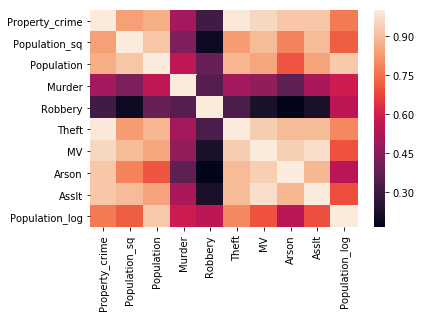

In [13]:
 correlation_matrix = df.corr()
display(correlation_matrix)
sns.heatmap(df.corr())
plt.show

In [14]:
 # Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = df['Property_crime'].values.reshape(-1, 1)
X = df[['Population','Murder','Robbery','Arson']]
regr.fit(X,Y)
 
 
 
# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))



Coefficients: 
 [[1.40834229e-02 1.18657424e+02 7.11943964e+01 5.61044416e+01]]

Intercept: 
 [-22.54983445]

R-squared:
0.9486113691674124


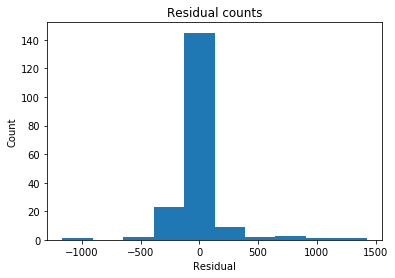

In [15]:
# Extract predicted values.
sqrroot_outcome = [math.sqrt(x) for x in  df.Property_crime]

predicted = regr.predict(X).ravel()
actual = df.Property_crime
# Calculate the error 
residual = actual - predicted

 
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

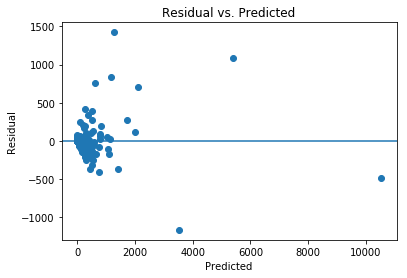

In [16]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [17]:
print ('RMSE:',(((predicted - actual) ** 2).mean() ** .5))  


RMSE: 218.21194852834705


## Test Statisics, dropping features, and re-fitting

In [18]:
import scipy
import statsmodels.formula.api as smf
from statsmodels.sandbox.regression.predstd import wls_prediction_std

# Re-fit the model here.
linear_formula = 'Property_crime ~ Population+Murder+Robbery+Arson'
lm = smf.ols(formula=linear_formula, data=df).fit()
print(lm.params)
print()
print(lm.pvalues)
print()
print(lm.rsquared)

Intercept    -22.550
Population     0.014
Murder       118.657
Robbery       71.194
Arson         56.104
dtype: float64

Intercept    0.334
Population   0.000
Murder       0.060
Robbery      0.050
Arson        0.000
dtype: float64

0.9486113691674123


In [19]:
'''Dropped Murder and Robbery because of p-values >= .05 and added MV(motor vehicle theft) and Asslt. Dropped Population
replaced it with Population_sq
'''
import scipy
import statsmodels.formula.api as smf
from statsmodels.sandbox.regression.predstd import wls_prediction_std

# Re-fit the model here.
linear_formula = 'Property_crime ~ Population_sq+Theft+MV+Arson+Asslt'
lm = smf.ols(formula=linear_formula, data=df).fit()
print(lm.params)
print()
print(lm.pvalues)
print()
print(lm.rsquared)
 


Intercept       -4.499
Population_sq   -0.000
Theft            1.126
MV               2.775
Arson            4.956
Asslt            0.582
dtype: float64

Intercept       0.071
Population_sq   0.000
Theft           0.000
MV              0.000
Arson           0.000
Asslt           0.000
dtype: float64

0.9990944949528091


In [20]:
lm.conf_int()

,0,1
Intercept,-9.390,0.392
Population_sq,-0.000,-0.000
Theft,1.108,1.144
MV,2.296,3.254
Arson,3.742,6.169
Asslt,0.409,0.755


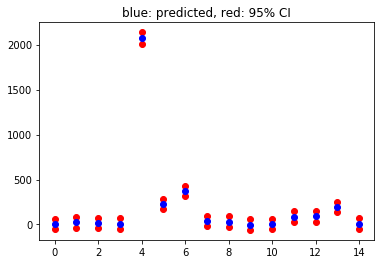

In [21]:
# Use wls_prediction_std to build confidence intervals
prstd, iv_l, iv_u = wls_prediction_std(lm)

plt.figure()
plt.plot(iv_u[0:15], 'o', color='r')
plt.plot(iv_l[0:15], 'o', color='r')
plt.plot(lm.fittedvalues[0:15], 'o', color='b')
plt.title('blue: predicted, red: 95% CI')
plt.show()

In [22]:
# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = df['Property_crime'].values.reshape(-1, 1)
X = df[['Population_sq','Theft','MV','Arson','Asslt']]
regr.fit(X,Y)
 
 
 
# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[-1.34746199e-08  1.12618433e+00  2.77493494e+00  4.95550986e+00
   5.82191693e-01]]

Intercept: 
 [-4.49859056]

R-squared:
0.9990944949528091


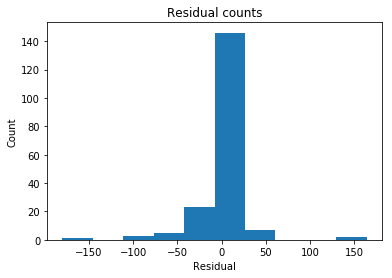

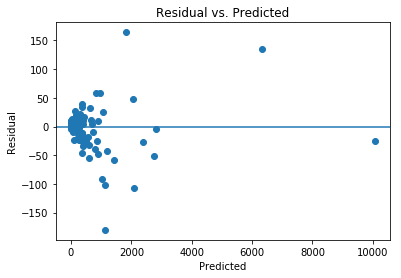

RMSE: 28.966127745806965


In [23]:
# Extract predicted values.
sqrroot_outcome = [math.sqrt(x) for x in  df.Property_crime]

predicted = regr.predict(X).ravel()
actual = df.Property_crime
# Calculate the error 
residual = actual - predicted

 
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()



plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()
print ('RMSE:',(((predicted - actual) ** 2).mean() ** .5) )  


In [24]:
from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.2, random_state=20)
print('With 20% Holdout: ' + str(regr.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(regr.fit(X, Y).score(X, Y)))
print()
from sklearn.model_selection import cross_val_score
print(cross_val_score(regr, X, Y, cv=10))
    

With 20% Holdout: 0.9915935856368006
Testing on Sample: 0.9990944949528091

[0.99823671 0.99645181 0.99529209 0.9932164  0.94345254 0.99584706
 0.99001634 0.99937439 0.99793855 0.98766935]


### Testing on 2017 Texas crime data

In [25]:
# load Texas 2017 crime data
dfTX = pd.read_csv('C:/Users/keith/Desktop/Thinkful/Texas2.csv')
dfTX['Population_sq'] = dfTX['Population^2']

X = df[['Population_sq','Theft','MV','Arson','Asslt']]
Y = df.Property_crime
X2 = dfTX[['Population_sq','Theft','MV','Arson','Asslt']]
Y2 = dfTX.Property_crime


from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.2, random_state=20)
print('With 20% Holdout: ' + str(regr.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(regr.fit(X, Y).score(X2, Y2)))
    

With 20% Holdout: 0.9915935856368006
Testing on Sample: 0.9931498321662103


In [26]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(regr, X, Y, cv=10))
print()
print(cross_val_score(regr, X2, Y2, cv=10))

[0.99823671 0.99645181 0.99529209 0.9932164  0.94345254 0.99584706
 0.99001634 0.99937439 0.99793855 0.98766935]

[0.99754039 0.99964476 0.9979975  0.99611863 0.99270975 0.99861479
 0.9923655  0.99635342 0.99514633 0.99321245]


#### Using the model

In [27]:
dfTX.head(20)

,Unnamed: 0,City,Property_crime,Population,Murder,Robbery,Theft,MV,Arson,Asslt,Population^2,Population_sq
0,0,Abernathy,12,2821,0,0,0,0,1,0,7958041,7958041
1,1,Abilene,4769,119401,1,1,3460,254,16,314,1371696913,1371696913
2,2,Addison,784,15961,1,1,593,62,1,35,254753521,254753521
3,3,Alamo,1336,18876,0,1,1052,81,1,126,356303376,356303376
4,4,Alamo Heights,235,7443,0,1,194,5,0,5,55398249,55398249
5,5,Alice,1208,19673,0,1,929,43,14,135,387026929,387026929
6,6,Allen,1205,91289,0,1,985,50,13,36,-256253071,-256253071
7,7,Alton,325,14756,1,1,223,33,2,3,217739536,217739536
8,8,Alvarado,161,3813,0,1,101,10,1,12,14538969,14538969
9,9,Alvin,668,25110,1,1,513,38,0,27,630512100,630512100


In [28]:
inx =7
print((dfTX.loc[inx,'City']))
print(dfTX.loc[inx,'Property_crime'])
print(-1.32776666+(dfTX.loc[inx,'Theft']*1.11779833) + (dfTX.loc[inx,'MV']*1.98830101) + 
      (dfTX.loc[inx,'Arson']*7.02498132) +(dfTX.loc[inx,'Asslt']* 0.32760403))

Alton
325
328.58796899
